In [ ]:
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("StudentsPerformance.csv")
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [ ]:
#to find garbage value
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
print(df.head(10))
print(df.tail(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

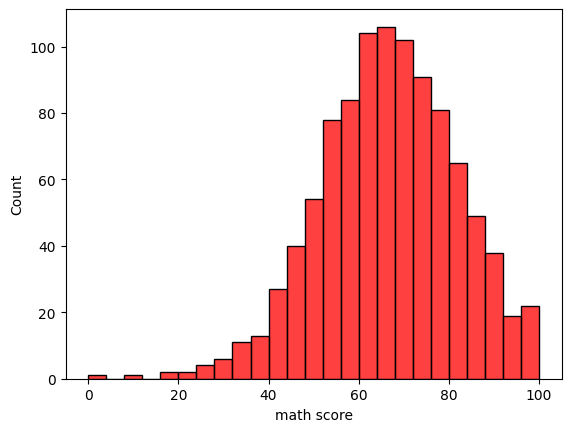

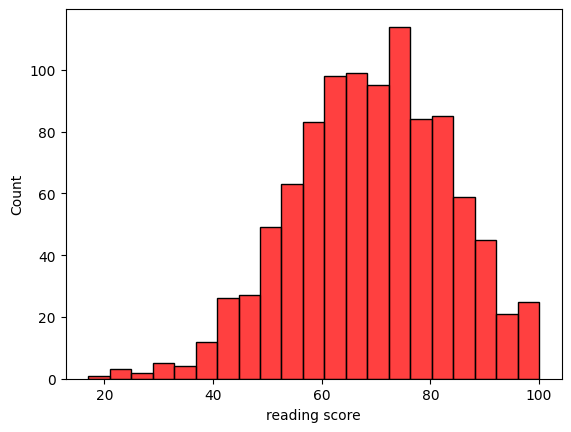

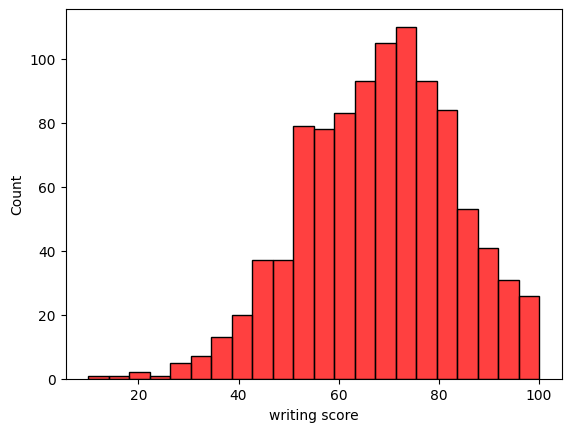

In [ ]:
#histogram distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,color='red')
  plt.show()

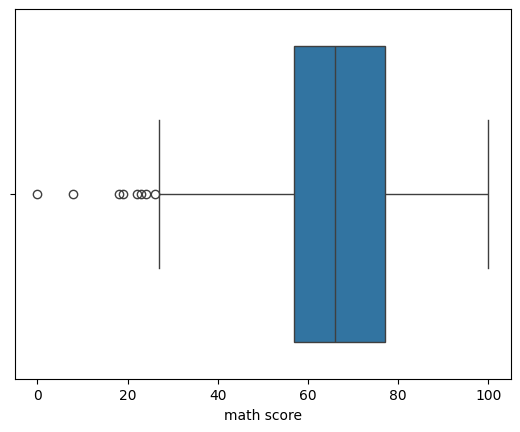

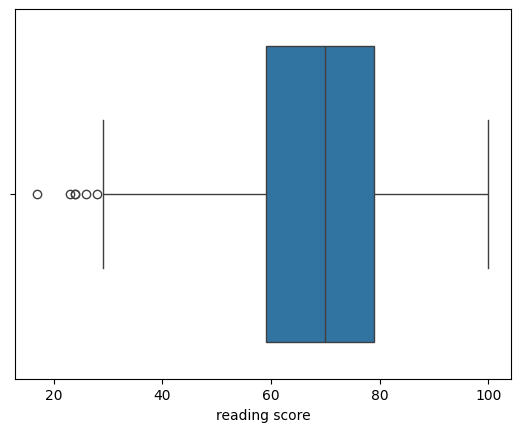

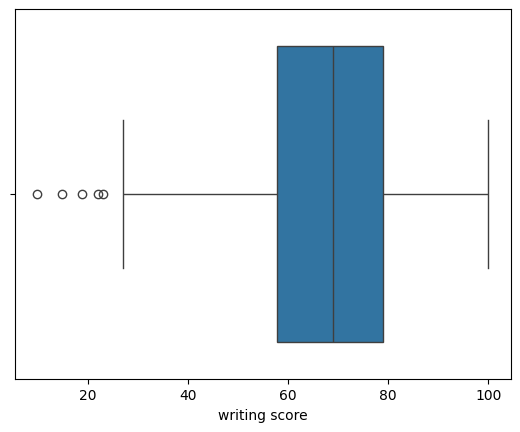

In [ ]:
#to identify outlier by using boxplot
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()


<Axes: >

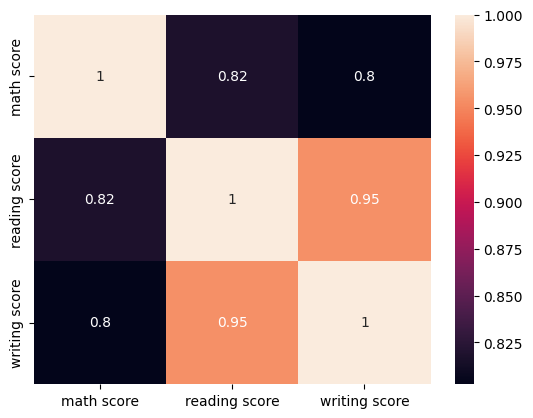

In [ ]:
#to find correlation
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)



In [ ]:
#to find categorical datas
s=df.select_dtypes(include="object")
print(s)
print(df.columns)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  
0                      none  
1                 completed  
2                      none  
3              

In [ ]:
print(df.columns)
def whisker(col):
  q1,q3=np. q1,q3=np.percentile(col,[25,70])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw
whisker(df['math score'])
for i in (['math score','reading score', 'writing score']):
  lw,uw=whisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


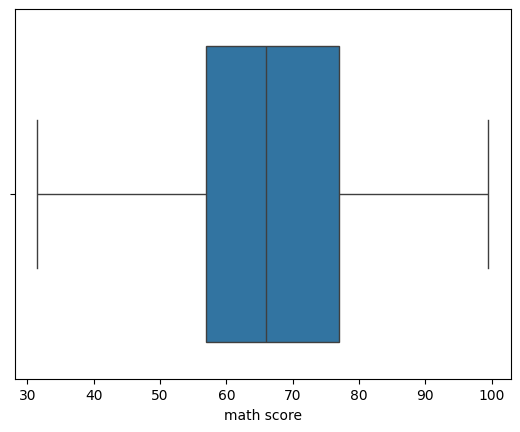

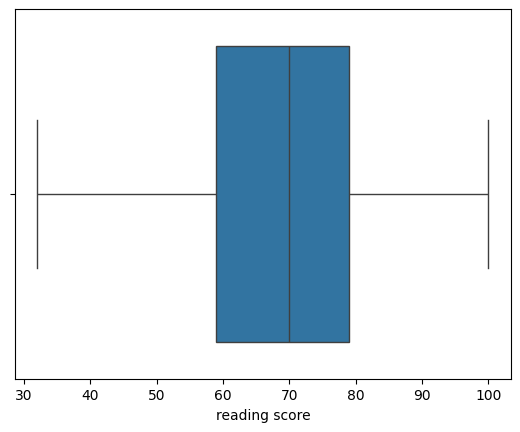

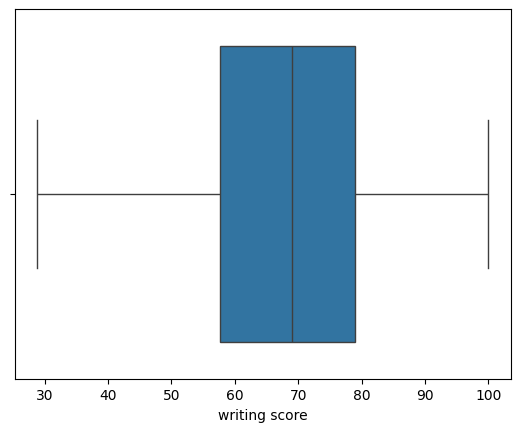

In [ ]:
# after clearing outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()


In [ ]:
# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)
print(df)
# Step 4: Feature selection
X = df.drop("math score", axis=1)  # or use reading/writing score
y = df["math score"]


     math score  reading score  writing score  gender_male  \
0          72.0           72.0           74.0        False   
1          69.0           90.0           88.0        False   
2          90.0           95.0           93.0        False   
3          47.0           57.0           44.0         True   
4          76.0           78.0           75.0         True   
..          ...            ...            ...          ...   
995        88.0           99.0           95.0        False   
996        62.0           55.0           55.0         True   
997        59.0           71.0           65.0        False   
998        68.0           78.0           77.0        False   
999        77.0           86.0           86.0        False   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                      True                   False                   False   
1                     False                    True                   False   
2                 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 7: Prediction
y_pred = model.predict(X_test)



In [ ]:
# Step 8: Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8642950003127566
MSE: 29.558923769376126


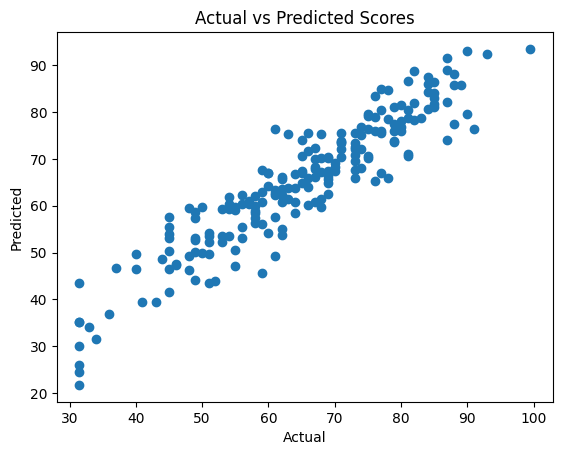

In [ ]:
#Step 9: Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scores")
plt.show()

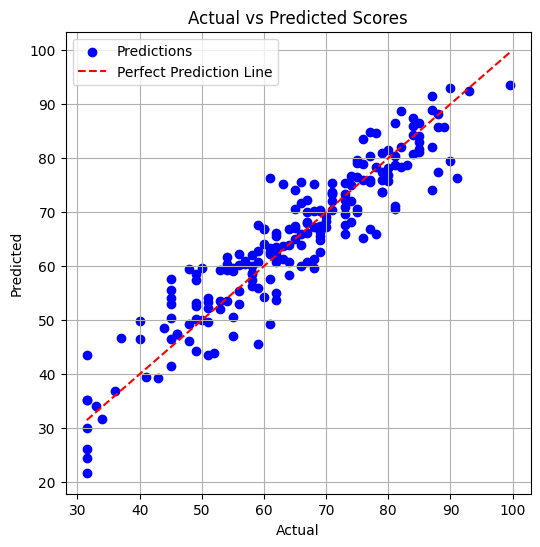

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')  # y = x line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.grid()
plt.show()








